## AMAZON SALE REPORT :

#### Import Libraries :

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Read Dataset :

In [80]:
df = pd.read_csv('Amazon Sale Report.csv', encoding='windows-1252')
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [81]:
df.shape

(128976, 21)

In [82]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

In [83]:
df.nunique()

index                 128808
Order ID              120229
Date                      91
Status                    13
Fulfilment                 2
Sales Channel              2
ship-service-level         2
Category                   9
Size                      11
Courier Status             4
Qty                       10
currency                   1
Amount                  1408
ship-city               8948
ship-state                69
ship-postal-code        9454
ship-country               1
B2B                        2
fulfilled-by               1
New                        0
PendingS                   0
dtype: int64

#### Data PreProcessing :

In [84]:
## Checking for Null Values :

df.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [85]:
## Handle missing values :

df['currency'] = df['currency'].fillna('Unknown')

df = df.dropna(subset=['Amount'])

# Fill categorical columns with 'Unknown'
df['ship-city'].fillna('Unknown', inplace=True)
df['ship-state'].fillna('Unknown', inplace=True)
df['ship-postal-code'].fillna(0, inplace=True)
df['ship-country'].fillna('Unknown', inplace=True)

# Fill the 'fulfilled-by' column with its mode
df['fulfilled-by'] = df['fulfilled-by'].mode()[0]

# Drop columns like 'New' and 'PendingS' that contains all null_values
df.drop(columns=['New', 'PendingS'], inplace=True)

print(df.isnull().sum())

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64


In [86]:
df.shape

(121176, 19)

In [87]:
## Checking for Duplicates :

df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [88]:
df.shape

(121019, 19)

In [89]:
## Checking datatypes :

df.dtypes

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Category               object
Size                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
B2B                      bool
fulfilled-by           object
dtype: object

In [90]:
## Changing Datatype of 'DATE' 

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df['Qty'] = pd.to_numeric(df['Qty'], errors='coerce')
df.dtypes

index                          int64
Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Category                      object
Size                          object
Courier Status                object
Qty                            int64
currency                      object
Amount                       float64
ship-city                     object
ship-state                    object
ship-postal-code             float64
ship-country                  object
B2B                             bool
fulfilled-by                  object
dtype: object

In [91]:
## Info of Dataset :

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121019 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               121019 non-null  int64         
 1   Order ID            121019 non-null  object        
 2   Date                121019 non-null  datetime64[ns]
 3   Status              121019 non-null  object        
 4   Fulfilment          121019 non-null  object        
 5   Sales Channel       121019 non-null  object        
 6   ship-service-level  121019 non-null  object        
 7   Category            121019 non-null  object        
 8   Size                121019 non-null  object        
 9   Courier Status      121019 non-null  object        
 10  Qty                 121019 non-null  int64         
 11  currency            121019 non-null  object        
 12  Amount              121019 non-null  float64       
 13  ship-city           121019 non-nul

In [92]:
## Data Consistency / Basic Statistics :

df.describe()

,index,Date,Qty,Amount,ship-postal-code
count,121019.000000,121019,121019.000000,121019.000000,121019.000000
mean,64562.667143,2022-05-12 12:37:23.548534016,0.961246,648.631921,463515.105306
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000,0.000000
25%,32420.500000,2022-04-20 00:00:00,1.000000,449.000000,382421.000000
50%,64565.000000,2022-05-10 00:00:00,1.000000,605.000000,500032.000000
75%,96720.500000,2022-06-04 00:00:00,1.000000,788.000000,600020.000000
max,128974.000000,2022-06-29 00:00:00,8.000000,5584.000000,989898.000000
std,37183.193053,NaN,0.214311,281.224583,191442.074611


### Data Visualisation of Numerical and Categorical Columns :

In [93]:
num_cols = df.dtypes[df.dtypes!='object'].index
cat_cols = df.dtypes[df.dtypes=='object'].index

print('Numerical_Columns:' ,num_cols)
print('\n Categorical_Columns:' ,cat_cols)

Numerical_Columns: Index(['index', 'Date', 'Qty', 'Amount', 'ship-postal-code', 'B2B'], dtype='object')

 Categorical_Columns: Index(['Order ID', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'currency',
       'ship-city', 'ship-state', 'ship-country', 'fulfilled-by'],
      dtype='object')


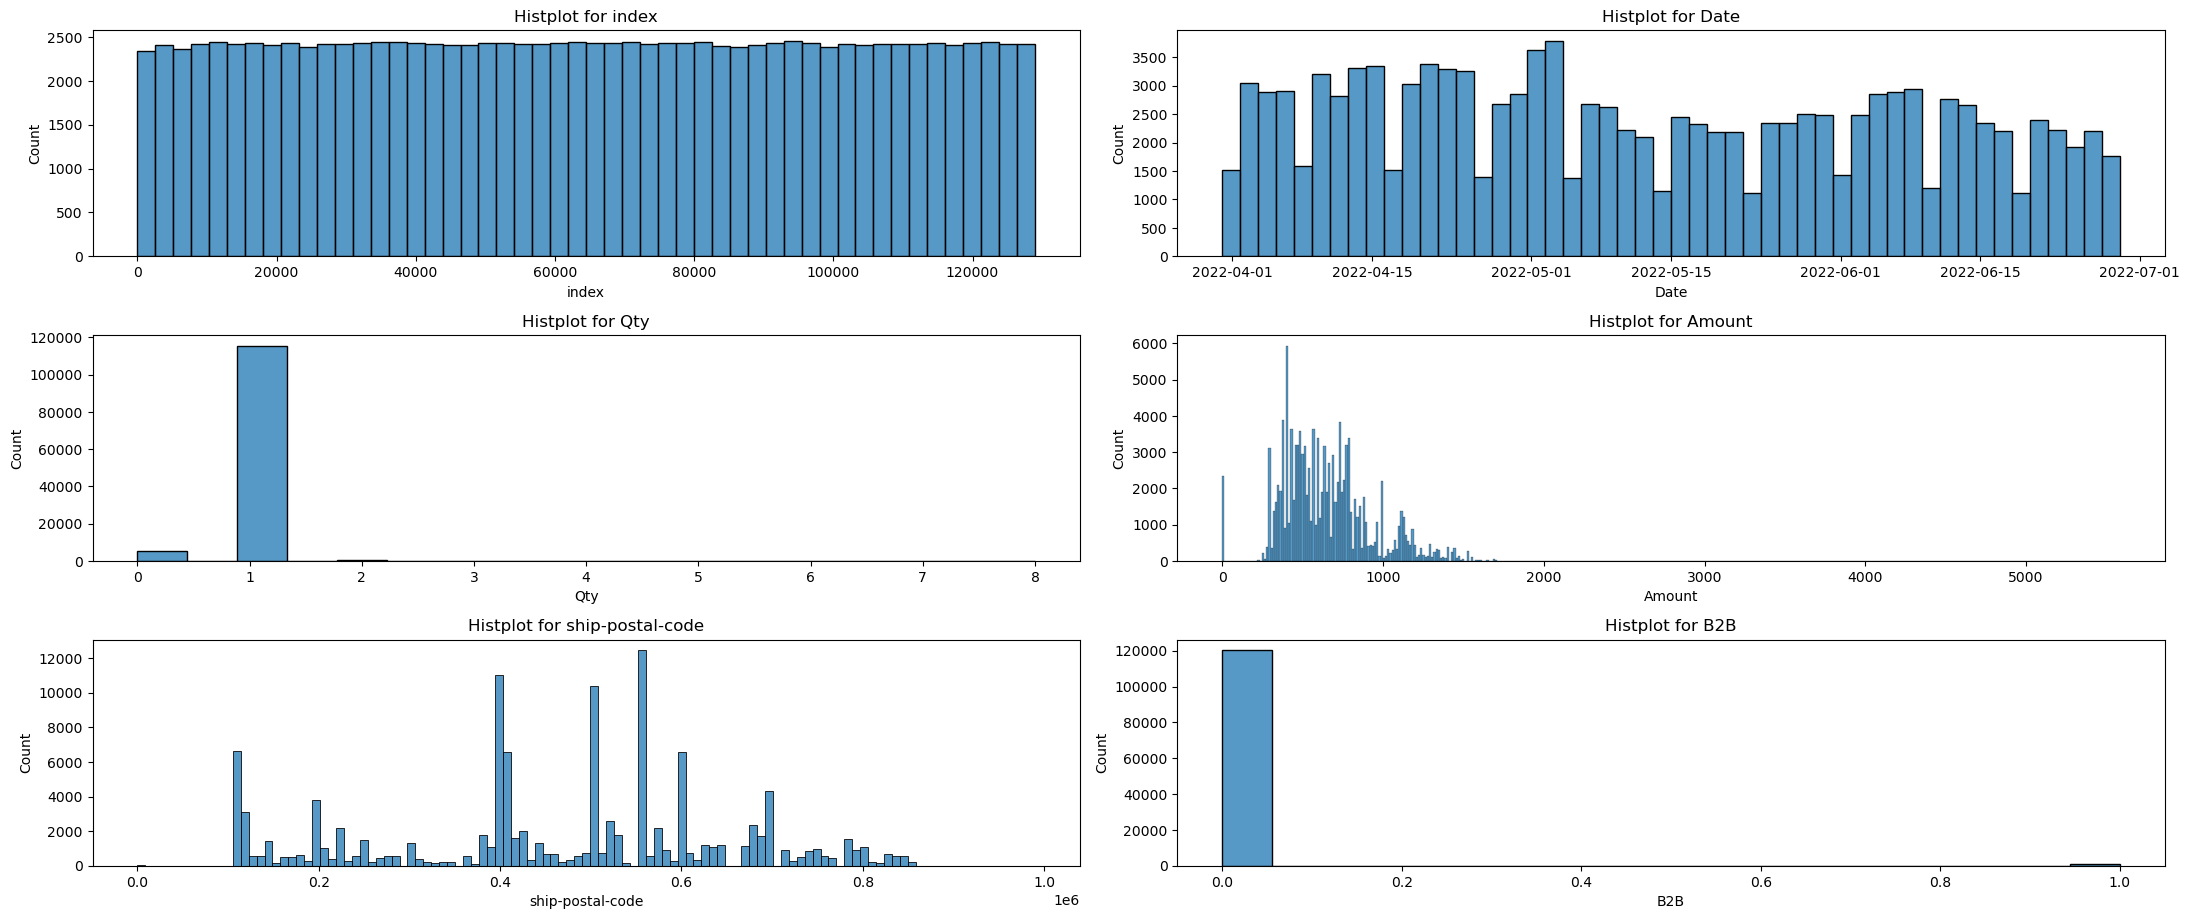

In [94]:
## NUMERICAL COLUMNS :

plt.figure(figsize=(22,18))
for i in range(len(num_cols)):  
    plt.subplot(6,2,i+1)
    sns.histplot(x=df[num_cols[i]])
    plt.title(f'Histplot for {num_cols[i]}')
    plt.tight_layout()
plt.show()

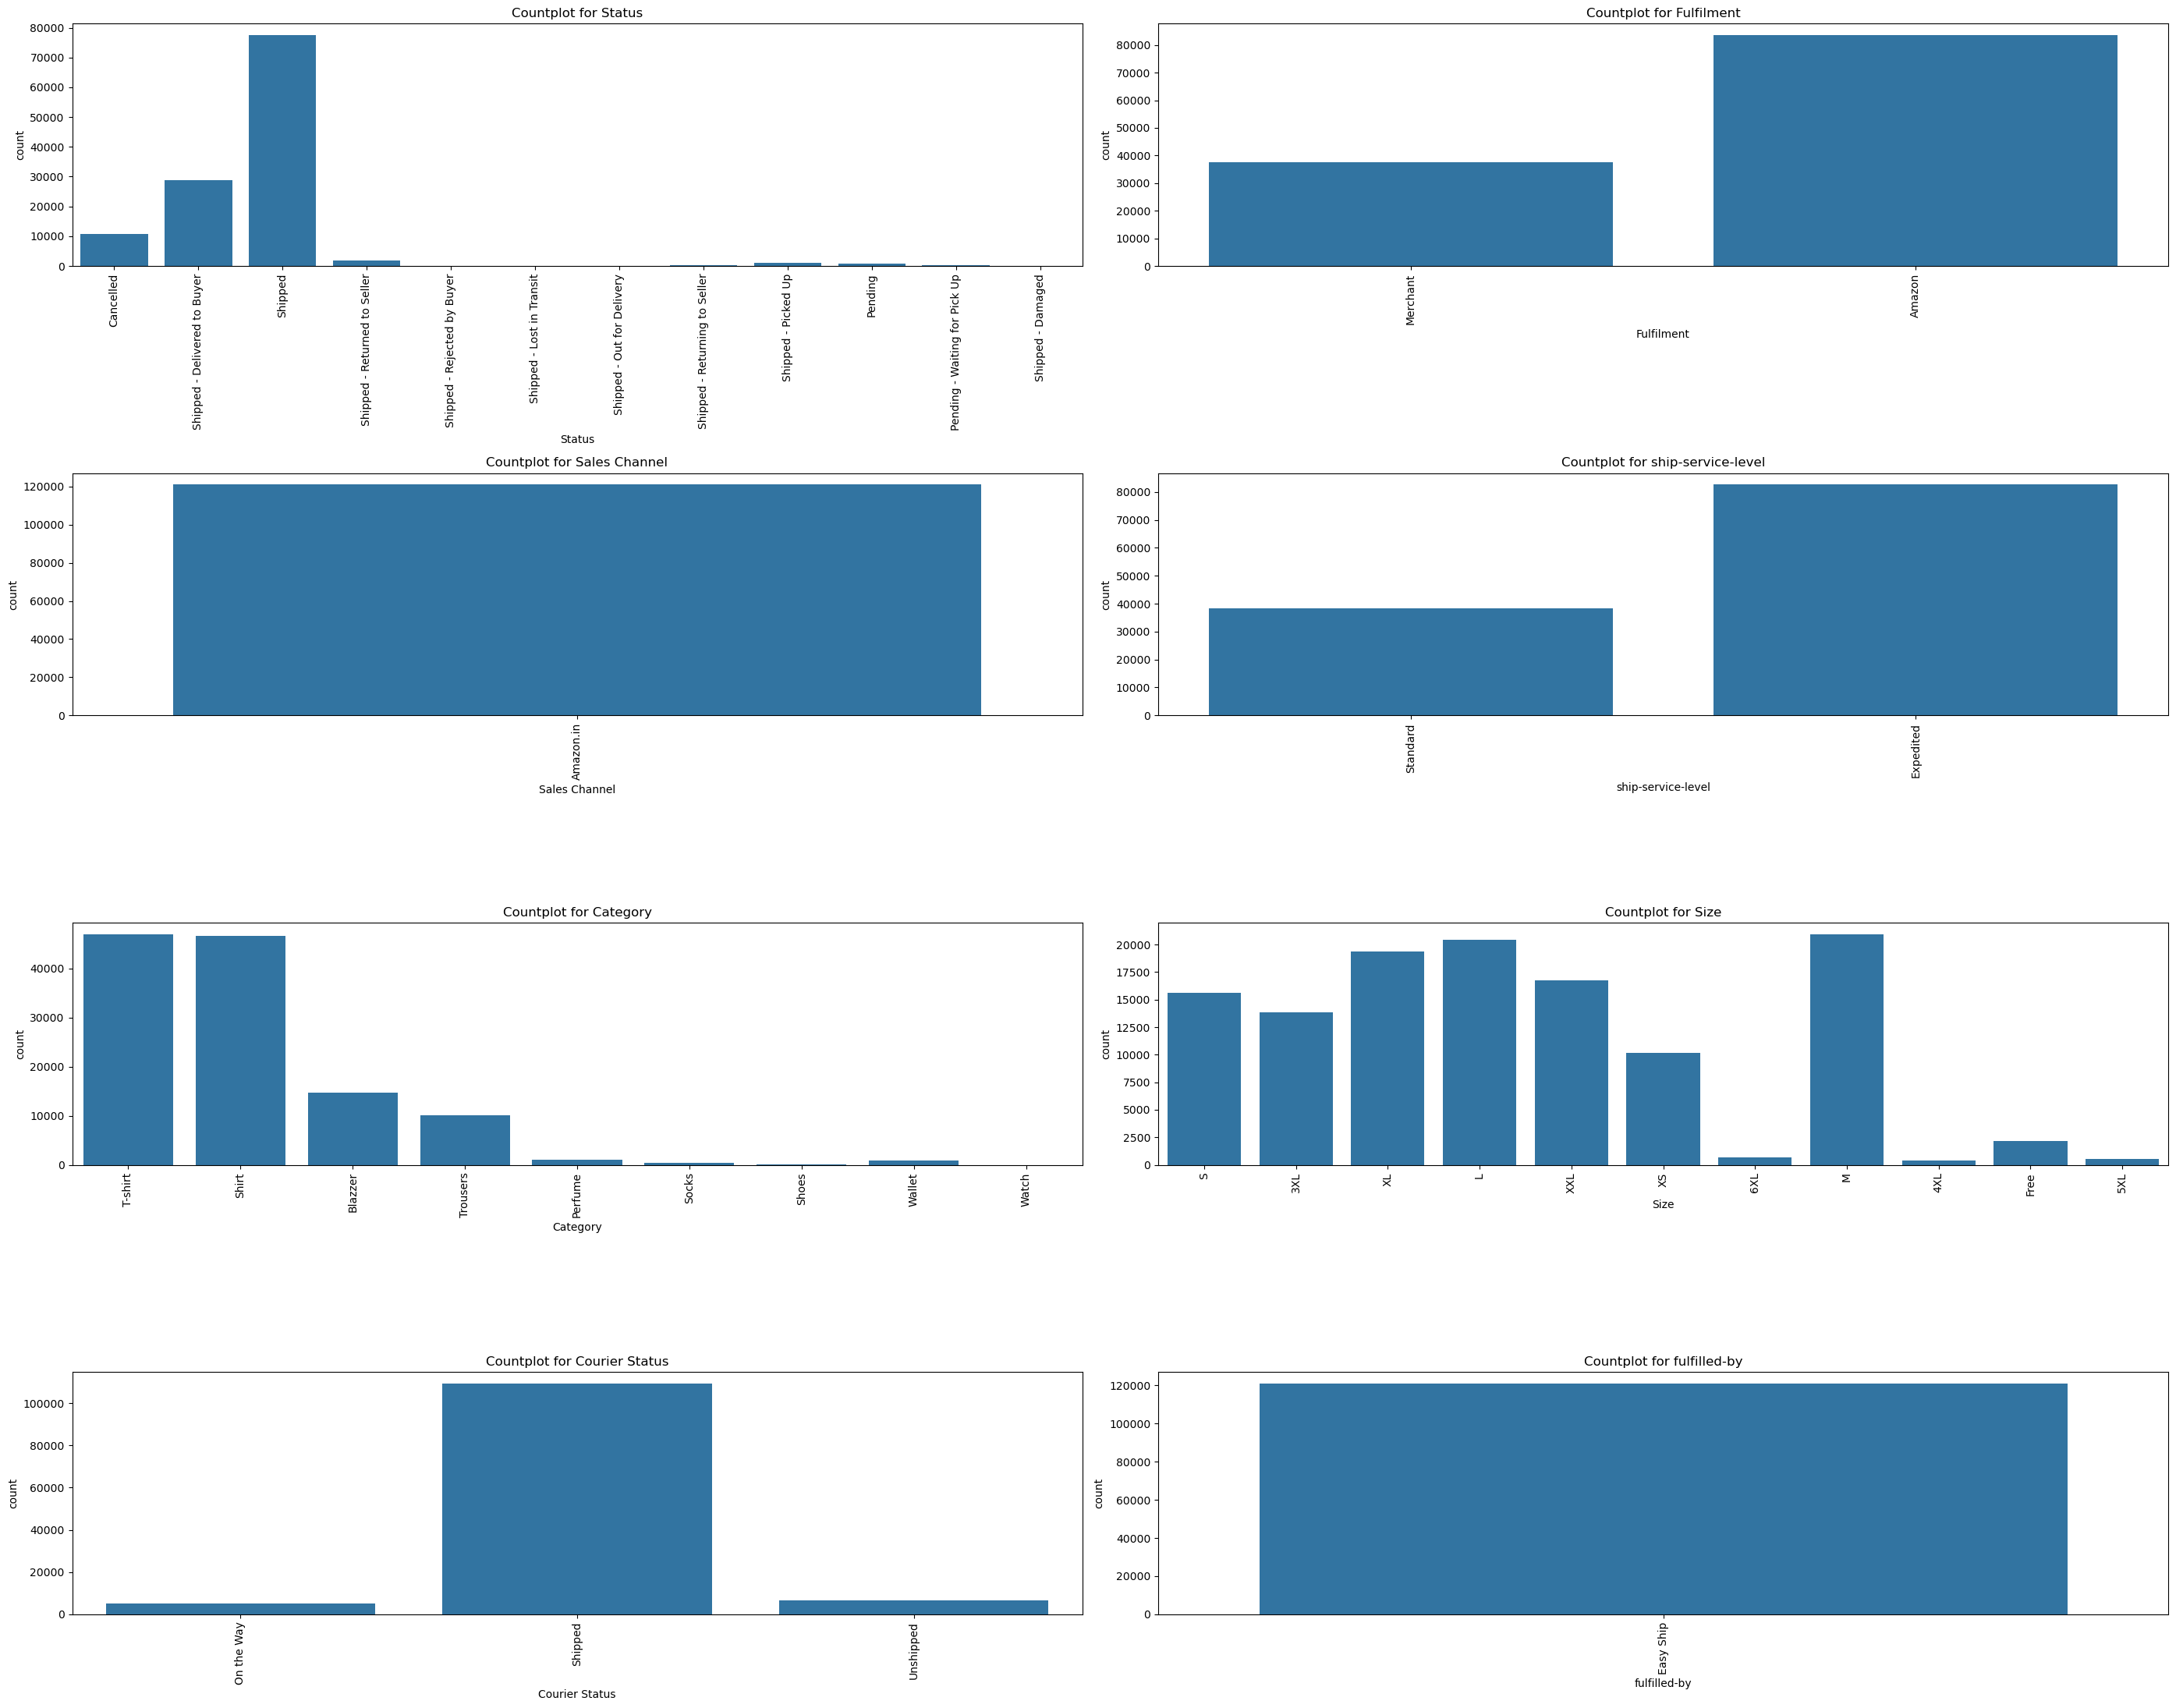

In [95]:
## CATEGORICAL COLUMNS :

cat_cols1 = ['Status', 'Fulfilment', 'Sales Channel', 'ship-service-level', 'Category', 'Size', 'Courier Status', 'fulfilled-by']

plt.figure(figsize=(28,22))
for i in range(len(cat_cols1)):  
    plt.subplot(4,2,i+1)
    sns.countplot(x=df[cat_cols1[i]])
    plt.title(f'Countplot for {cat_cols1[i]}')
    plt.xticks(rotation=90)
    plt.tight_layout()
plt.show()

# SALES ANALYSIS :

#### Calculate Daily Sales Trends {in terms of Qty} ?

         Date   Qty
0  2022-03-31   156
1  2022-04-01  1319
2  2022-04-02  1408
3  2022-04-03  1544
4  2022-04-04  1330
..        ...   ...
86 2022-06-25   940
87 2022-06-26  1122
88 2022-06-27  1023
89 2022-06-28  1104
90 2022-06-29   627

[91 rows x 2 columns]


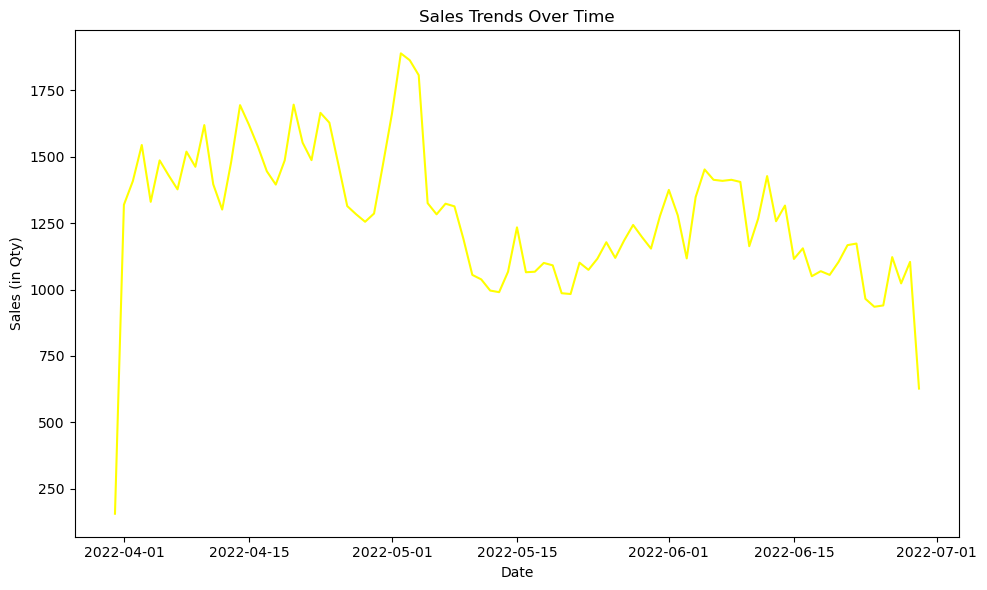

In [96]:
daily_sales = df.groupby('Date')['Qty'].sum().reset_index()
print(daily_sales)

plt.figure(figsize=(10,6))
sns.lineplot(data=daily_sales, x='Date', y='Qty', color='yellow')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales (in Qty)')
plt.tight_layout()
plt.show()

#### What is the total sales value by month, and how does it change over time?

In [97]:
df['Month'] = df['Date'].dt.to_period('M')
df['Sales'] = df['Amount'] * df['Qty']

monthly_sales = df.groupby('Month')['Sales'].sum().reset_index().sort_values(by='Month', ascending=True)
monthly_sales

,Month,Sales
0,2022-03,98261.0
1,2022-04,27754705.0
2,2022-05,25326683.0
3,2022-06,22762217.0


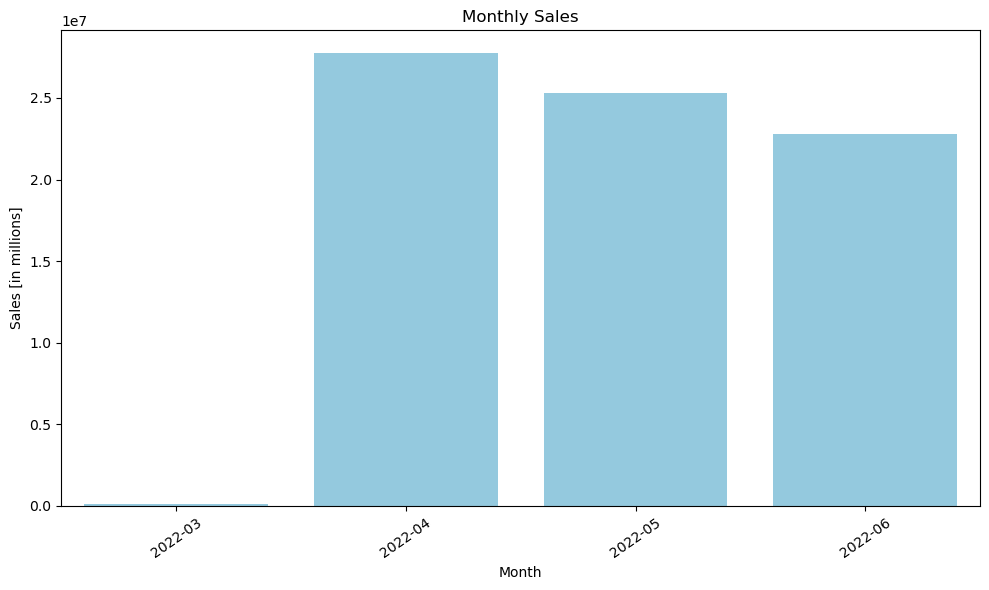

In [98]:
plt.figure(figsize=(10,6))
sns.barplot(data=monthly_sales, x='Month', y='Sales', color='skyblue')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales [in millions]')
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()

#### What is the number of completed and pending orders by sales channel?

In [99]:
df['Completed_Orders'] = df['Status'].apply(lambda x: 1 if x in ['Shipped - Delivered to Buyer', 'Shipped', 'Shipped - Returned to Seller', 
                                                            'Shipped - Rejected by Buyer', 'Shipped - Lost in Transit', 'Shipped - Out for Delivery', 
                                                            'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Shipped - Damaged'] else 0)


df['Pending_Orders'] = df['Status'].apply(lambda x: 1 if x in ['Pending', 'Pending - Waiting for Pick Up'] else 0)


result = df.groupby('Sales Channel')[['Completed_Orders', 'Pending_Orders']].sum().reset_index()
print(result)

  Sales Channel  Completed_Orders  Pending_Orders
0     Amazon.in            109331             937


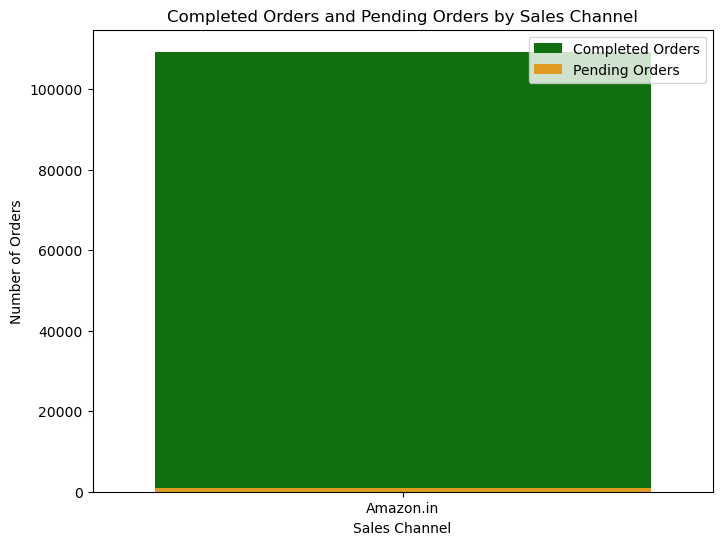

In [100]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Sales Channel', y='Completed_Orders', data=result, color='green', label='Completed Orders')
sns.barplot(x='Sales Channel', y='Pending_Orders', data=result, color='orange', label='Pending Orders')
plt.title('Completed Orders and Pending Orders by Sales Channel')
plt.ylabel('Number of Orders')
plt.xlabel('Sales Channel')
plt.legend()
plt.show()

#### How do sales vary by fulfillment method (e.g., fulfilled by the company vs third-party fulfillment)?

In [103]:
df['Sales'] = df['Amount'] * df['Qty']

res2 = df.groupby('Fulfilment').agg(Total_Sales=('Sales', 'sum'),Total_Orders=('Order ID', 'nunique')).reset_index()
print(res2)

  Fulfilment  Total_Sales  Total_Orders
0     Amazon   54654161.0         78211
1   Merchant   21287705.0         34676


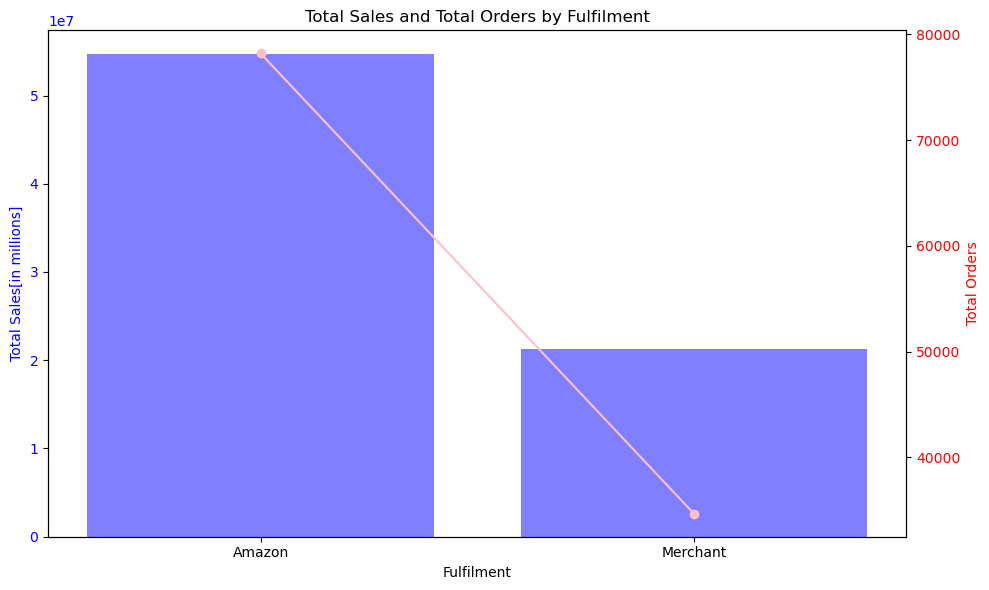

In [102]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(res2['Fulfilment'], res2['Total_Sales'], color='blue', alpha=0.5, label='Total Sales')
ax1.set_xlabel('Fulfilment')
ax1.set_ylabel('Total Sales[in millions]', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(res2['Fulfilment'], res2['Total_Orders'], color='pink', marker='o', label='Total Orders')
ax2.set_ylabel('Total Orders', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Total Sales and Total Orders by Fulfilment')
fig.tight_layout()
plt.show()

#### Total Qty Sold by Size :

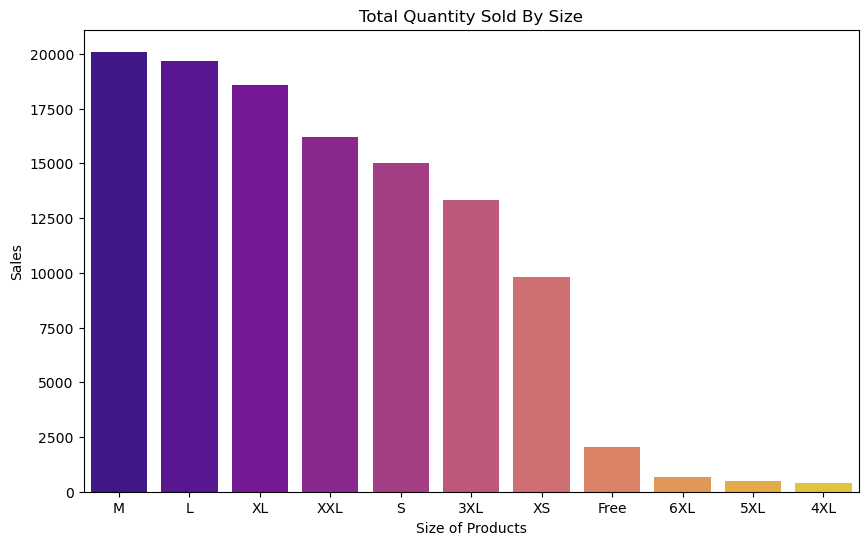

In [36]:
size_sales = df.groupby('Size')['Qty'].sum().reset_index().sort_values(by='Qty',ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=size_sales, x='Size', y='Qty', palette='plasma')
plt.title('Total Quantity Sold By Size')
plt.xlabel('Size of Products')
plt.ylabel('Sales')
plt.show()

#### Calculate Total Sales by Courier Status ?

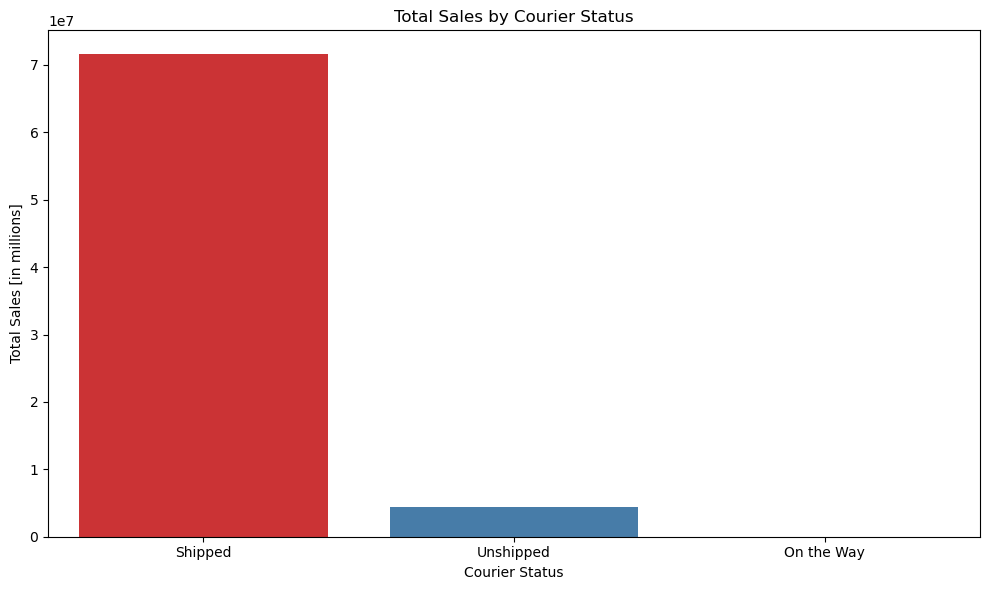

In [37]:
sales_by_courier_status = df.groupby('Courier Status')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=sales_by_courier_status, x='Courier Status', y='Sales', palette='Set1')
plt.title('Total Sales by Courier Status')
plt.xlabel('Courier Status')
plt.ylabel('Total Sales [in millions]')
plt.tight_layout()
plt.show()

# PRODUCT ANALYSIS :

#### Which product categories generate the most revenue?

In [38]:
pa1 = df.groupby('Category').agg(Total_Revenue=('Sales', 'sum')).reset_index().sort_values(by='Total_Revenue', ascending=False)
print(pa1)

   Category  Total_Revenue
5   T-shirt     37885025.0
2     Shirt     20647301.0
0   Blazzer     10701134.0
6  Trousers      5236444.0
1   Perfume       761151.0
7    Wallet       441259.0
4     Socks       142870.0
3     Shoes       125767.0
8     Watch          915.0


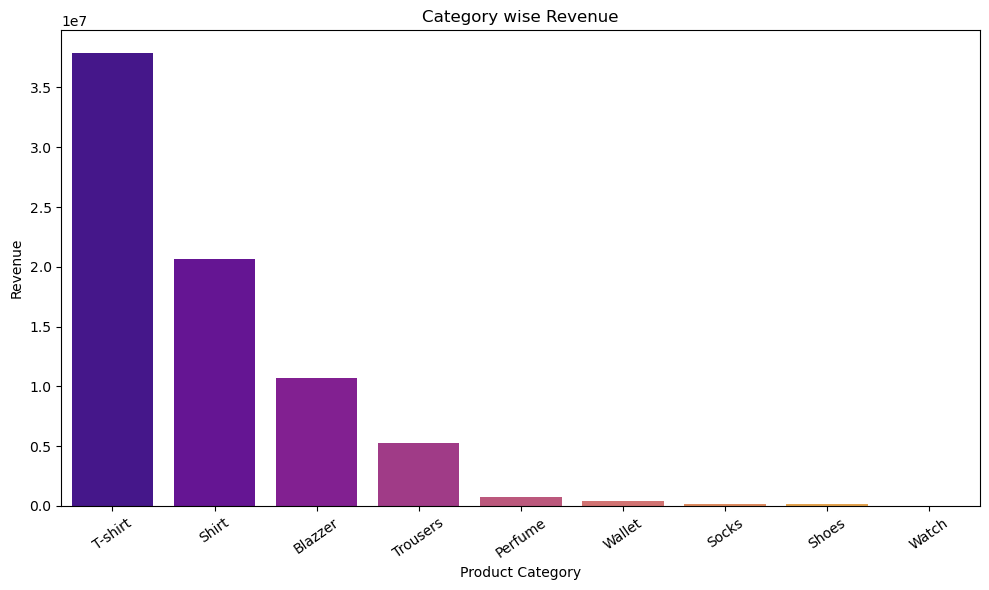

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(data=pa1, x='Category', y='Total_Revenue', palette='plasma')
plt.title('Category wise Revenue')
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()

#### What is the total quantity sold and total amount generated by product size and category?

In [40]:
df['Sales'] = df['Amount'] * df['Qty']

pa2 = df.groupby(['Category','Size']).agg(Total_Sales=('Sales', 'sum'),Total_Qty=('Qty', 'sum')).reset_index().sort_values(by='Total_Qty', 
                                                                                                                              ascending=False)
pa2.head()

,Category,Size,Total_Sales,Total_Qty
31,T-shirt,M,7004787.0,8340
12,Shirt,L,3610540.0,8014
15,Shirt,XL,3503045.0,7817
13,Shirt,M,3462592.0,7689
30,T-shirt,L,6130340.0,7383


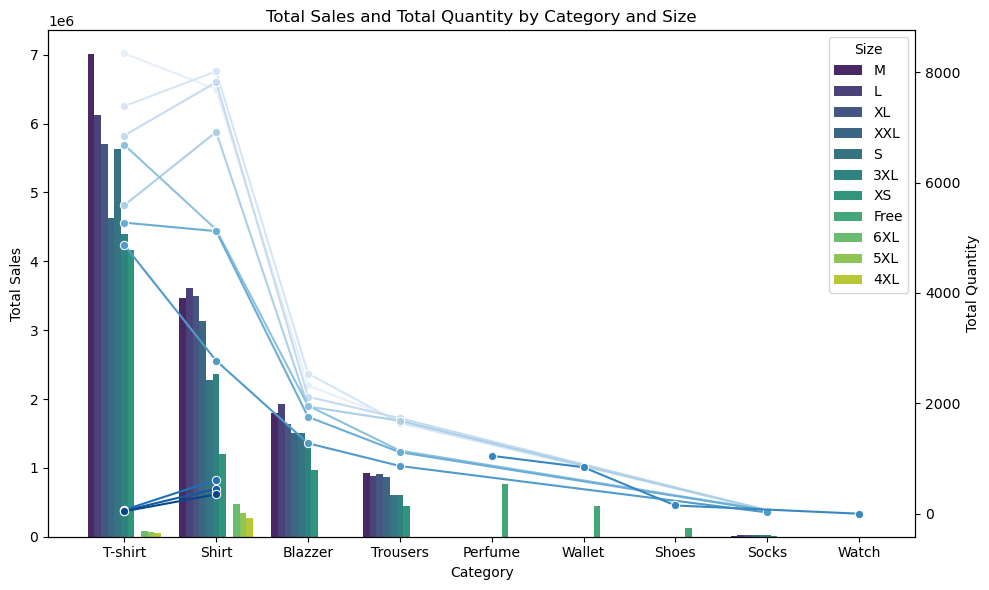

In [41]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Total Sales on the first y-axis
sns.barplot(data=pa2, x='Category', y='Total_Sales', hue='Size', ax=ax1, palette='viridis')
ax1.set_xlabel('Category')
ax1.set_ylabel('Total Sales')
ax1.set_title('Total Sales and Total Quantity by Category and Size')

# Create a second y-axis to plot Total Quantity
ax2 = ax1.twinx()
sns.lineplot(data=pa2, x='Category', y='Total_Qty', hue='Size', marker='o', ax=ax2, legend=False, palette='Blues')
ax2.set_ylabel('Total Quantity')

plt.tight_layout()
plt.show()

#### Which product categories have the highest number of orders?

In [42]:
pa3 = df.groupby('Category').agg(Total_Orders=('Order ID', 'nunique')).reset_index().sort_values(by='Total_Orders', ascending=False)
print(pa3)

   Category  Total_Orders
5   T-shirt         44678
2     Shirt         43527
0   Blazzer         14207
6  Trousers          9699
1   Perfume          1082
7    Wallet           853
4     Socks           391
3     Shoes           135
8     Watch             2


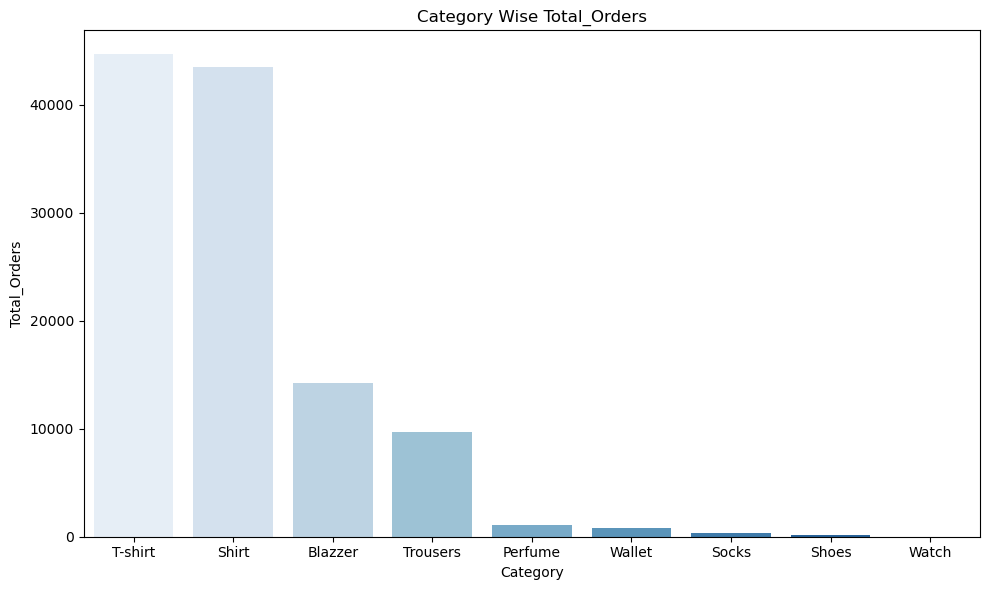

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(data=pa3, x='Category', y='Total_Orders', palette='Blues')
plt.title('Category Wise Total_Orders')
plt.xlabel('Category')
plt.ylabel('Total_Orders')
plt.tight_layout()
plt.show()

# Fulfillment Analysis :

#### What is the total sales value and order count by fulfillment method?

In [44]:
df['Sales'] = df['Amount'] * df['Qty']

fa1 = df.groupby('Fulfilment').agg(Total_Sales=('Sales', 'sum'),Total_Orders=('Order ID', 'nunique')).reset_index()
print(fa1)

  Fulfilment  Total_Sales  Total_Orders
0     Amazon   54654161.0         78211
1   Merchant   21287705.0         34676


#### How effective is each fulfillment method in completing orders (i.e., completion rate)?

In [45]:
df['Completed_Orders'] = df['Status'].apply(lambda x: 1 if x in ['Shipped - Delivered to Buyer', 'Shipped', 'Shipped - Returned to Seller', 
                                                            'Shipped - Rejected by Buyer', 'Shipped - Lost in Transit', 'Shipped - Out for Delivery', 
                                                            'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Shipped - Damaged'] else 0)

fa2 = df.groupby('Fulfilment').agg(Total_Completed=('Completed_Orders', 'sum'),Total_Orders=('Order ID', 'nunique')).reset_index()

fa2['Completion_Rate'] = (fa2['Total_Completed'] / fa2['Total_Orders']) * 100

fa2

,Fulfilment,Total_Completed,Total_Orders,Completion_Rate
0,Amazon,77505,78211,99.097314
1,Merchant,31826,34676,91.781059


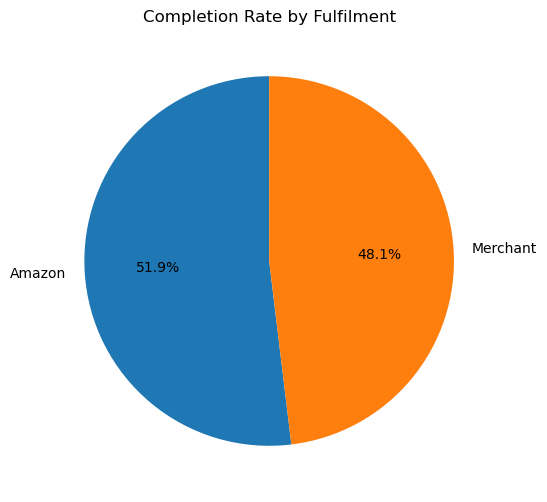

In [46]:
plt.figure(figsize=(6,6))
plt.pie(fa2['Completion_Rate'], labels=fa2['Fulfilment'], autopct='%1.1f%%', startangle=90)
plt.title('Completion Rate by Fulfilment')
plt.show()

#### What is the total quantity shipped by fulfillment method?

In [47]:
fa3 = df.groupby('Fulfilment').agg(Total_Qty=('Qty', 'sum')).reset_index()
fa3

,Fulfilment,Total_Qty
0,Amazon,83823
1,Merchant,32506


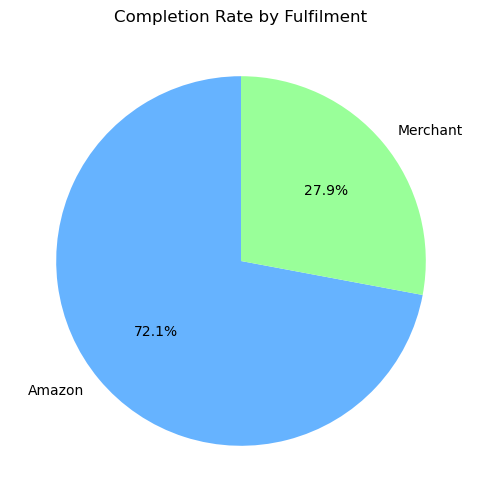

In [48]:
plt.figure(figsize=(6,6))
plt.pie(fa3['Total_Qty'], labels=fa3['Fulfilment'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Completion Rate by Fulfilment')
plt.show()

# CUSTOMER SEGMENTATION :

#### What is the average amount spent by customers based on state?

In [104]:
df['Total_Spent'] = df['Amount'] * df['Qty']

cs1 = df.groupby('ship-state').agg(Avg_Spent=('Total_Spent', 'mean')).reset_index().sort_values(by='ship-state', ascending=True)
cs1.head()

,ship-state,Avg_Spent
0,ANDAMAN & NICOBAR,614.214876
1,ANDHRA PRADESH,615.209671
2,AR,493.000000
3,ARUNACHAL PRADESH,690.559701
4,ASSAM,631.963178


#### Which cities generate the most revenue and the highest order volume?

In [50]:
df['Total_Revenue'] = df['Amount'] * df['Qty']

cs2 = df.groupby('ship-city').agg(Total_Revenue=('Total_Revenue', 'sum'), Total_Orders=('Order ID', 'nunique')).reset_index().sort_values(
    by=['Total_Revenue','Total_Orders'], ascending=[False, False])

cs2.head()

,ship-city,Total_Revenue,Total_Orders
750,BENGALURU,6698265.0,9934
2813,HYDERABAD,4793958.0,6967
4653,MUMBAI,3585314.0,5416
5230,NEW DELHI,3490346.0,5102
1416,CHENNAI,2994311.0,4667


#### What is the number of orders and total spend for each customer segment based on location (country)?

In [105]:
cs3 = df.groupby('ship-country').agg(Num_Orders=('Order ID', 'nunique'), Total_Spent=('Total_Spent', 'sum')).reset_index()

cs3.head()

,ship-country,Num_Orders,Total_Spent
0,IN,112861,75924335.0
1,Unknown,26,17531.0


# GEOGRAPHICAL ANALYSIS :

#### What is the total sales value by country?

In [52]:
ga1 = df.groupby('ship-country').agg(Total_Sales=('Sales', 'sum')).reset_index().sort_values(by='Total_Sales', ascending=False)
ga1

,ship-country,Total_Sales
0,IN,75924335.0
1,Unknown,17531.0


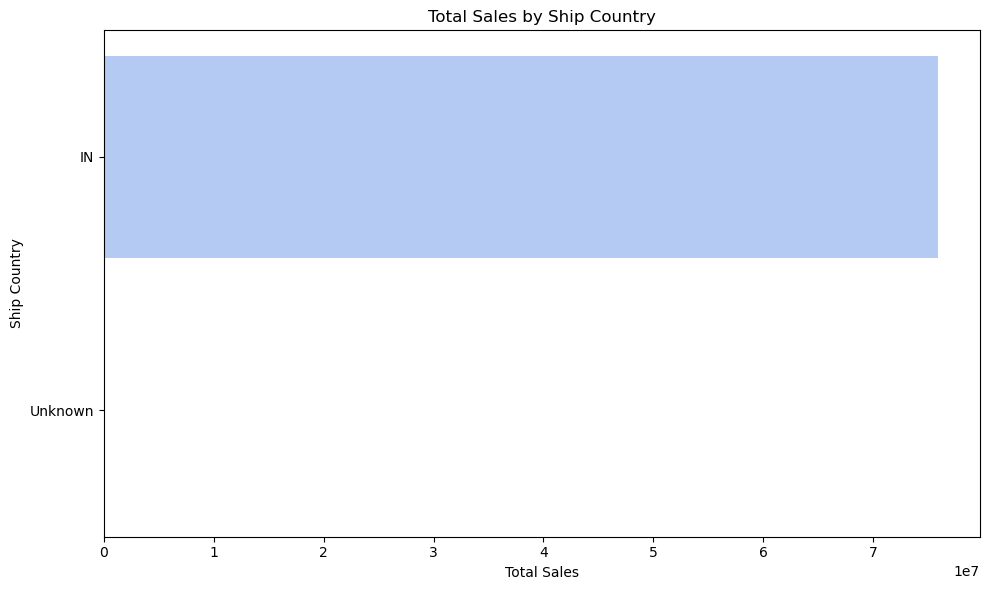

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Sales', y='ship-country', data=ga1, palette='coolwarm')
plt.title('Total Sales by Ship Country')
plt.xlabel('Total Sales')
plt.ylabel('Ship Country')
plt.tight_layout()
plt.show()

#### Which states have the highest number of orders?

In [54]:
ga2 = df.groupby('ship-state').agg(Num_Orders=('Order ID', 'nunique')).reset_index().sort_values(by='Num_Orders',ascending=False)
ga2.head()

,ship-state,Num_Orders
27,MAHARASHTRA,19648
22,KARNATAKA,15274
55,TAMIL NADU,9883
56,TELANGANA,9748
58,UTTAR PRADESH,9390


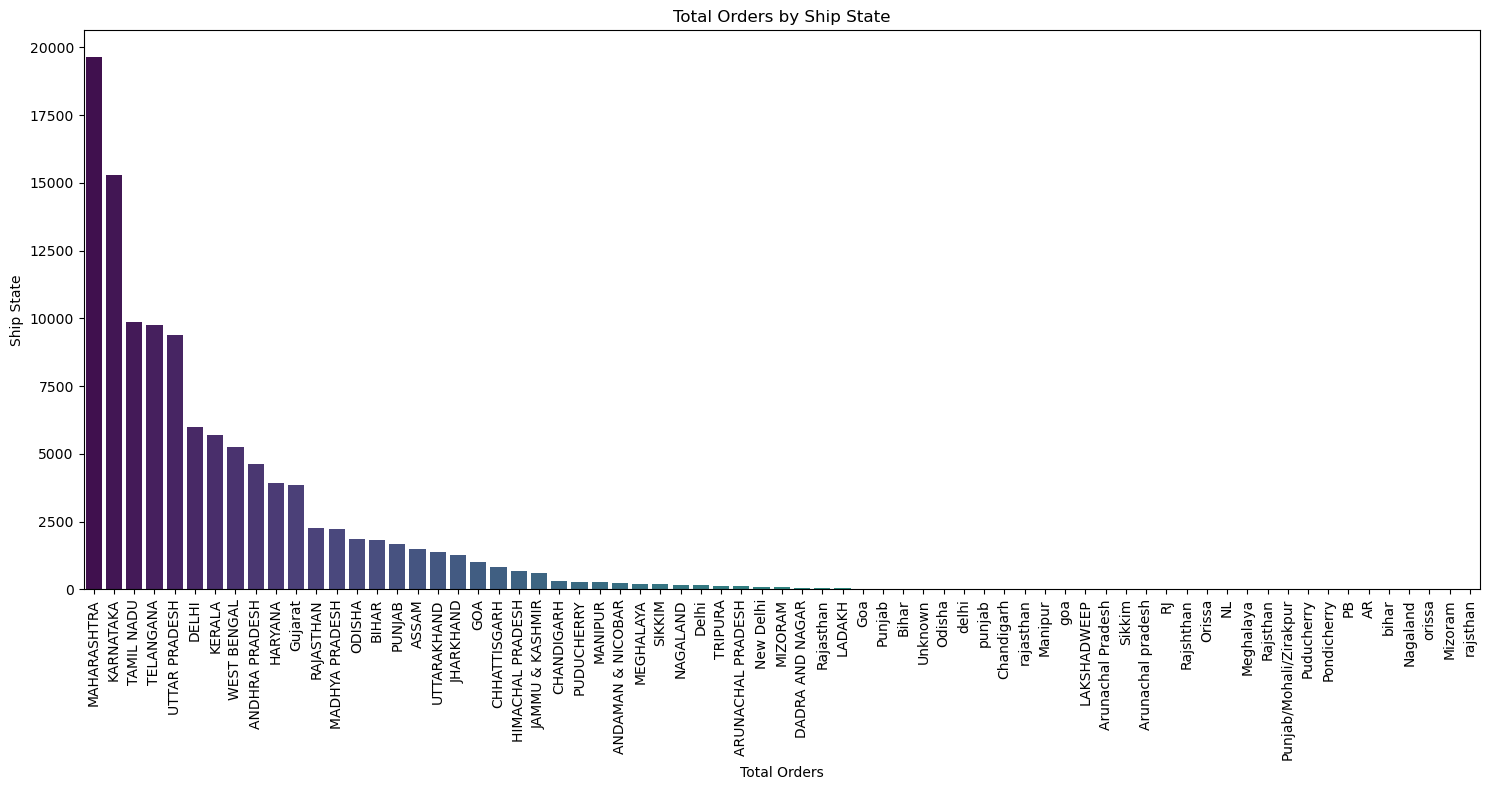

In [55]:
plt.figure(figsize=(15,8))
sns.barplot(x='ship-state', y='Num_Orders', data=ga2, palette='viridis')
plt.title('Total Orders by Ship State')
plt.xlabel('Total Orders')
plt.ylabel('Ship State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### What are the total quantities shipped by state and country?

In [56]:
ga3 = df.groupby(['ship-state','ship-country']).agg(Total_Qty=('Qty', 'sum')).reset_index().sort_values(by='Total_Qty',ascending=False)
ga3.head()

,ship-state,ship-country,Total_Qty
27,MAHARASHTRA,IN,20304
22,KARNATAKA,IN,15876
55,TAMIL NADU,IN,10400
56,TELANGANA,IN,10243
58,UTTAR PRADESH,IN,9495


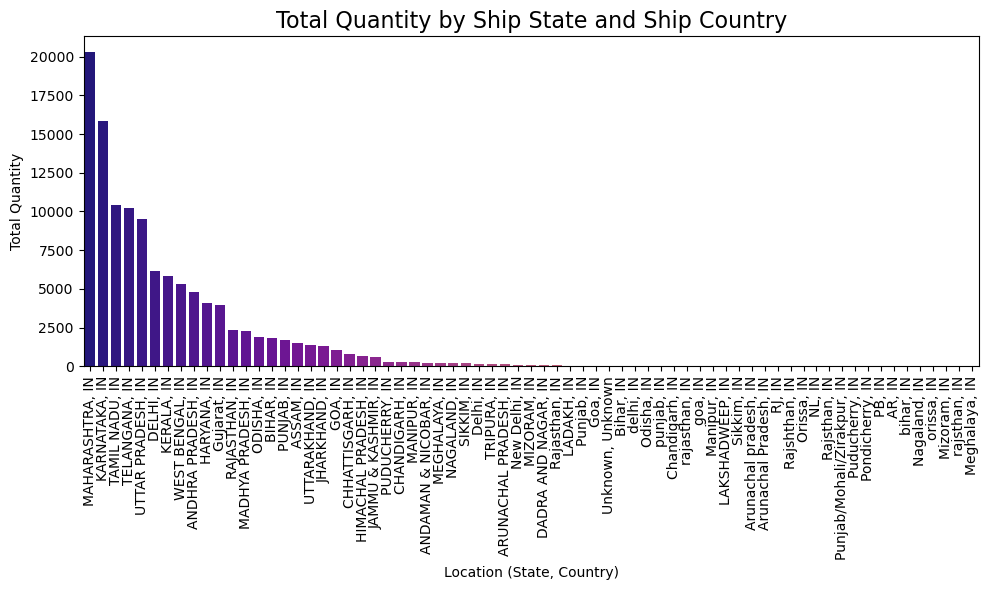

In [57]:
ga3['Location'] = ga3['ship-state'] + ", " + ga3['ship-country']

plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='Total_Qty', data=ga3, palette='plasma')
plt.title('Total Quantity by Ship State and Ship Country', fontsize=16)
plt.xlabel('Location (State, Country)')
plt.ylabel('Total Quantity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Top 10 State by Sales :

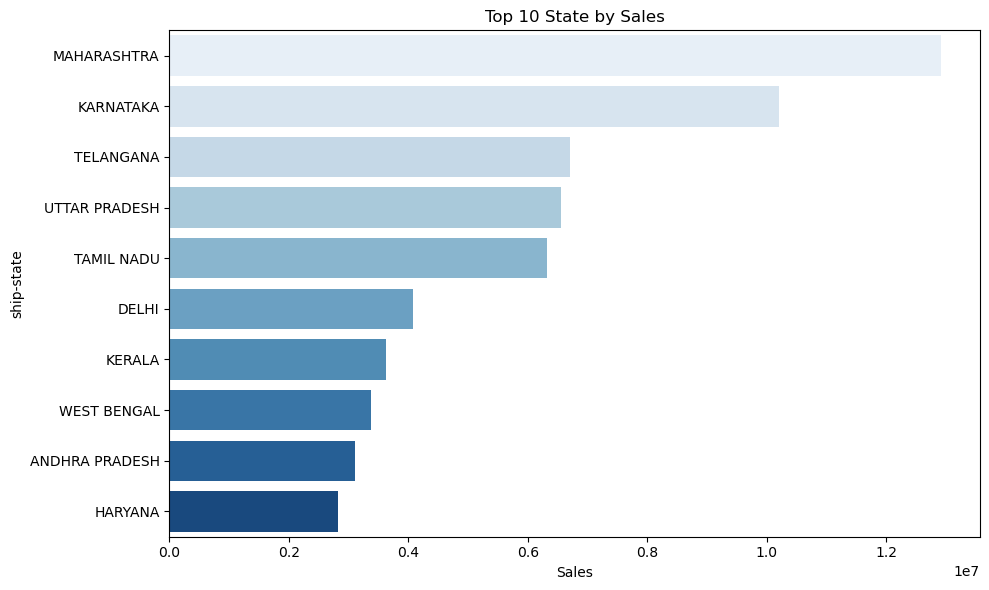

In [58]:
sales_by_state = df.groupby('ship-state')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)

Top_10_State_by_Sales = sales_by_state.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Sales', y='ship-state', data=Top_10_State_by_Sales, palette='Blues')
plt.title('Top 10 State by Sales')
plt.xlabel('Sales')
plt.ylabel('ship-state')
plt.tight_layout()
plt.show()

# ORDERS ANALYSIS :

#### Calculate Number of Orders by Status :

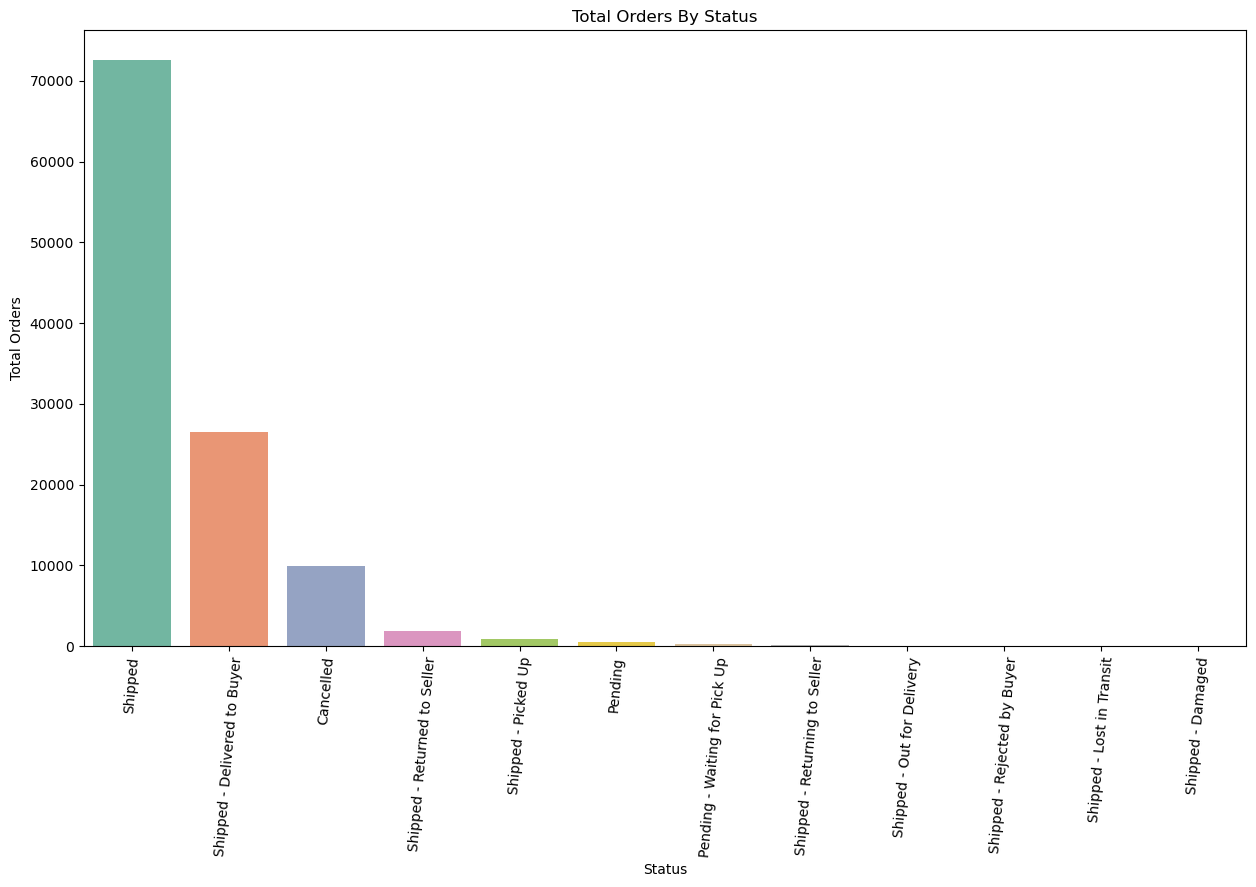

In [59]:
orders_by_status = df.groupby('Status').agg(Num_Of_Orders=('Order ID','nunique')).reset_index().sort_values(by='Num_Of_Orders',ascending=False)

plt.figure(figsize=(15,8))
sns.barplot(data=orders_by_status, x='Status', y='Num_Of_Orders', palette='Set2')
plt.title('Total Orders By Status')
plt.xlabel('Status')
plt.ylabel('Total Orders')
plt.xticks(rotation=85)
plt.show()

#### Calculate Percentage of Sales by Order Status :

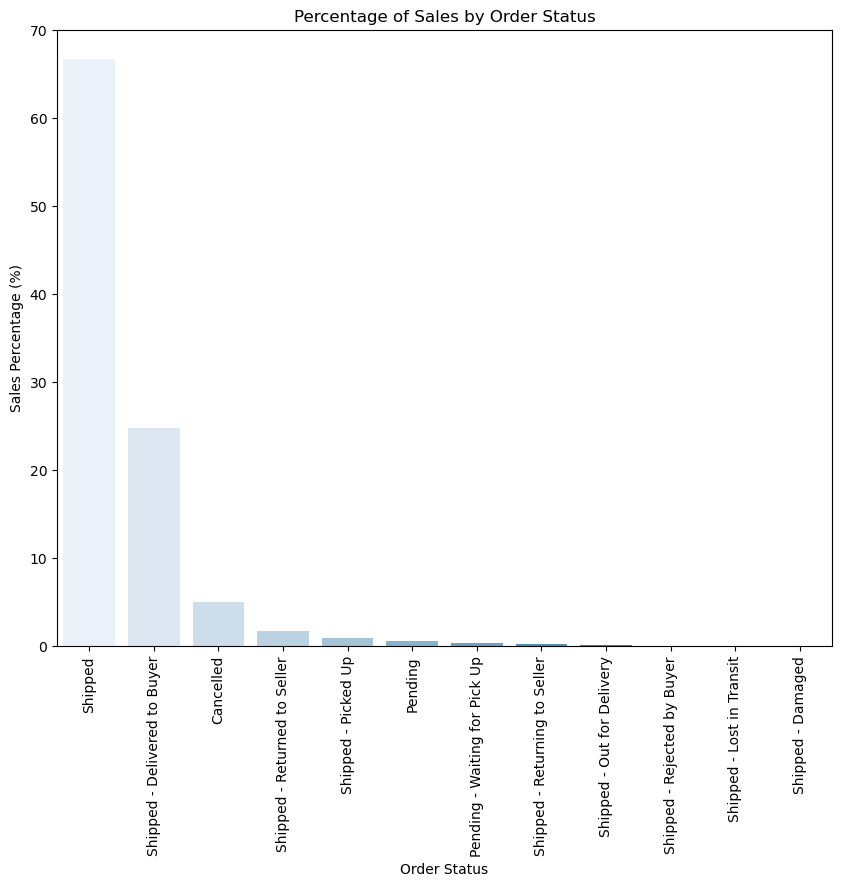

In [60]:
sales_by_status = df.groupby('Status')['Sales'].sum().reset_index()

sales_by_status['Sales_Percentage'] = (sales_by_status['Sales']/sales_by_status['Sales'].sum()) * 100

sales_by_status = sales_by_status.sort_values(by='Sales_Percentage', ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(data=sales_by_status, x='Status', y='Sales_Percentage', palette='Blues')
plt.title('Percentage of Sales by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Sales Percentage (%)')
plt.xticks(rotation=90)
plt.show()

# BUSINESS INSIGHTS :

#### Which combination of product category, fulfillment method, and sales channel leads to the highest sales?

In [61]:
b1 = df.groupby(['Category', 'Fulfilment', 'Sales Channel']).agg(Total_Sales=('Sales', 'sum')).reset_index().sort_values(by='Total_Sales',
                                                                                                                                 ascending=False)
b1.head(10)

,Category,Fulfilment,Sales Channel,Total_Sales
10,T-shirt,Amazon,Amazon.in,27789854.0
4,Shirt,Amazon,Amazon.in,15294139.0
11,T-shirt,Merchant,Amazon.in,10095171.0
0,Blazzer,Amazon,Amazon.in,6296981.0
5,Shirt,Merchant,Amazon.in,5353162.0
1,Blazzer,Merchant,Amazon.in,4404153.0
12,Trousers,Amazon,Amazon.in,4154577.0
13,Trousers,Merchant,Amazon.in,1081867.0
2,Perfume,Amazon,Amazon.in,581747.0
14,Wallet,Amazon,Amazon.in,344997.0


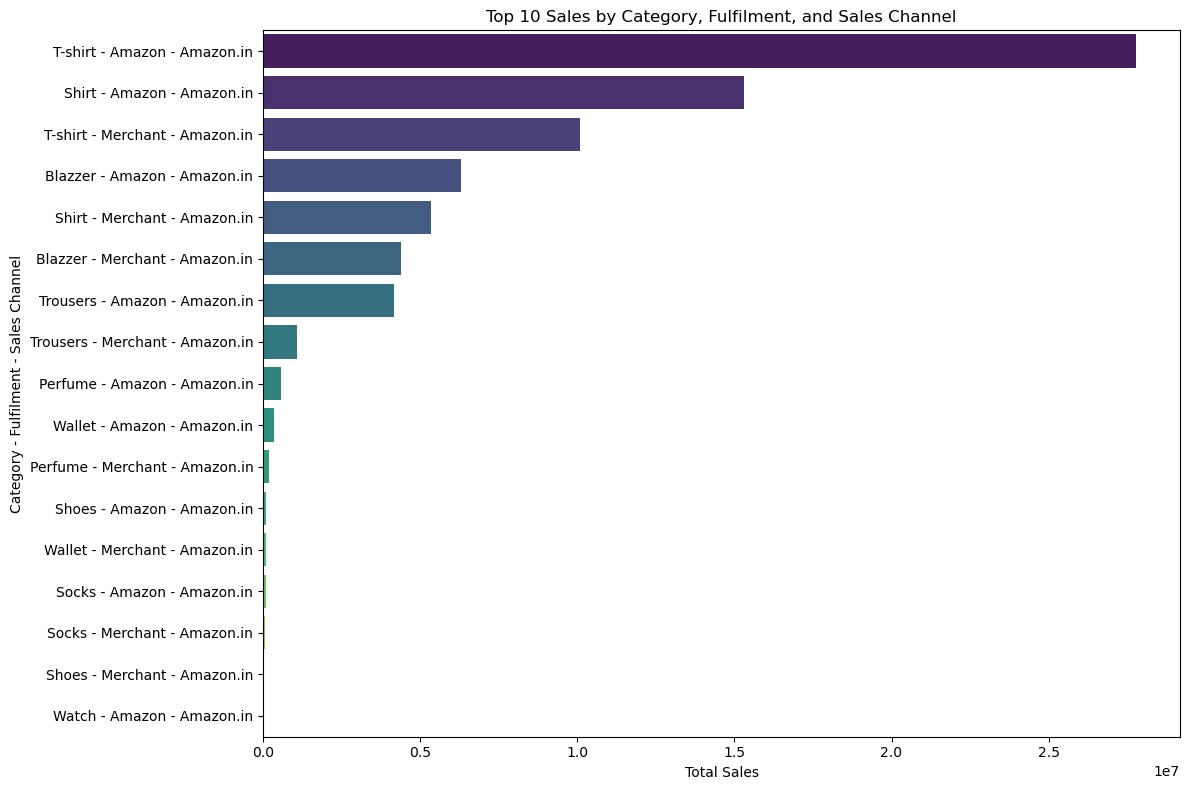

In [62]:
b1['Category_Fulfilment_SalesChannel'] = b1['Category'] + ' - ' + b1['Fulfilment'] + ' - ' + b1['Sales Channel']

plt.figure(figsize=(12, 8))
sns.barplot(x='Total_Sales', y='Category_Fulfilment_SalesChannel', data=b1, palette='viridis')
plt.title('Top 10 Sales by Category, Fulfilment, and Sales Channel')
plt.xlabel('Total Sales')
plt.ylabel('Category - Fulfilment - Sales Channel')
plt.tight_layout()
plt.show()

#### What is the customer order behavior (total spend and order frequency) by fulfillment method?

In [63]:
b2 = df.groupby('Fulfilment').agg(Total_Spent=('Total_Spent', 'sum'), Total_Orders=('Order ID', 'nunique'), 
                                  Average_order_value=('Amount', 'mean')).reset_index()

b2 = b2.sort_values(by='Total_Spent', ascending=False)
b2

,Fulfilment,Total_Spent,Total_Orders,Average_order_value
0,Amazon,54654161.0,78211,649.519583
1,Merchant,21287705.0,34676,646.653184


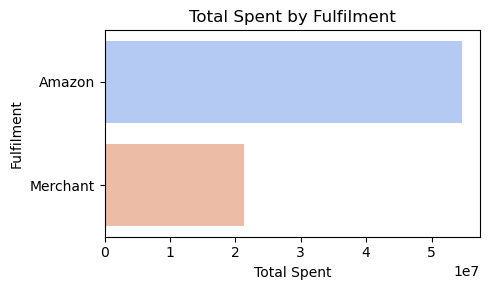

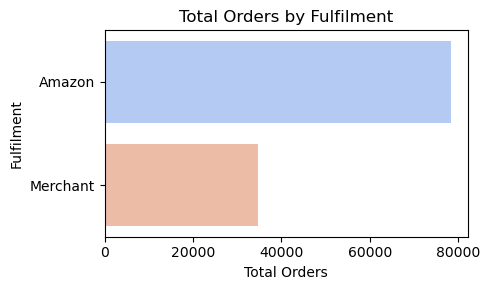

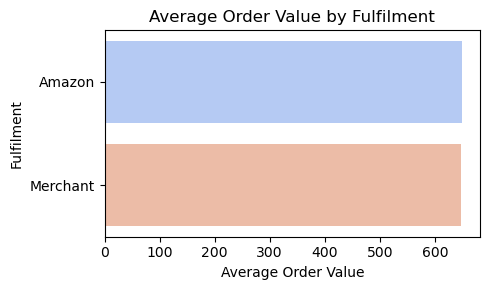

In [64]:
## Plotting Total Spent
plt.figure(figsize=(5,3))
sns.barplot(x='Total_Spent', y='Fulfilment', data=b2, palette='coolwarm')
plt.title('Total Spent by Fulfilment')
plt.xlabel('Total Spent')
plt.ylabel('Fulfilment')
plt.tight_layout()
plt.show()


## Plotting Total Orders
plt.figure(figsize=(5,3))
sns.barplot(x='Total_Orders', y='Fulfilment', data=b2, palette='coolwarm')
plt.title('Total Orders by Fulfilment')
plt.xlabel('Total Orders')
plt.ylabel('Fulfilment')
plt.tight_layout()
plt.show()


## Plotting Average Order Value
plt.figure(figsize=(5,3))
sns.barplot(x='Average_order_value', y='Fulfilment', data=b2, palette='coolwarm')
plt.title('Average Order Value by Fulfilment')
plt.xlabel('Average Order Value')
plt.ylabel('Fulfilment')
plt.tight_layout()
plt.show()

#### Which geographic region (city, state, country) has the highest order volume and sales value?

In [108]:
ba3 = df.groupby(['ship-city', 'ship-state', 'ship-country']).agg(Total_Orders=('Order ID', 'nunique'),
                                                                  Total_Sales=('Sales', 'sum')).reset_index().sort_values(by=['Total_Orders',
                                                                                                            'Total_Sales'], ascending=False)

ba3.head()

,ship-city,ship-state,ship-country,Total_Orders,Total_Sales
766,BENGALURU,KARNATAKA,IN,9934,6698265.0
2877,HYDERABAD,TELANGANA,IN,6959,4789057.0
4752,MUMBAI,MAHARASHTRA,IN,5416,3585314.0
5333,NEW DELHI,DELHI,IN,5092,3485309.0
1451,CHENNAI,TAMIL NADU,IN,4667,2994311.0


## INSIGHTS & RECOMMENDATIONS :

1.) <b>DAILY & MONTHLY SALES INSIGHTS :</b>
Daily sales in terms of quantity fluctuate significantly over time, with some peak days showing notably higher quantities sold than others (e.g., 2022-04-02 and 2022-04-03). There are specific periods where sales spikes occur, possibly due to seasonal promotions, holidays, or other external factors influencing consumer behavior.
Sales have a clear downward trend from March to June 2022, with a substantial drop from April (around Rs.27 million) to June (around Rs.22 million). There may be seasonal factors or market shifts contributing to the decrease in sales over time.

2.) <b>ORDER BY SALES CHANNEL :</b>
Amazon.in is the dominant sales channel with far more completed orders (109,331) than pending orders (937). Amazon.in has a highly effective order fulfillment and shipping process compared to other channels.

3.) <b>TOTAL SALES BY FULFILMENT METHOD :</b>
Amazon fulfillment (both Amazon and Merchant) drives the majority of the total sales (around ₹54 million for Amazon and ₹21 million for Merchant). Amazon's fulfillment methods contribute significantly to overall sales, indicating its efficiency in handling high sales volume and generating substantial revenue

4.) <b>TOTAL SALES BY CATEGORY & SIZE :</b>
The "M" and "L" sizes of T-shirts are among the highest-selling sizes. These sizes have a higher market demand, and focusing inventory and promotions on these sizes could lead to increased sales.

5.) <b>TOTAL SALES BY COURIER STATUS :</b>
Most of the total sales are tied to successful deliveries, with less revenue associated with orders that are in pending or "returned" status.
Courier delivery effectiveness plays a crucial role in maximizing revenue. Improving the efficiency of deliveries and minimizing delays will help boost total sales.

6.) <b>PRODUCT CATEGORIES & REVENUE :</b>
T-shirts generate the highest revenue by far (₹37.8 million), followed by Shirts and Blazzers. Offering a broader range of styles, colors, and promotions for T-shirts can further leverage this dominant category.

7.) <b>TOTAL ORDERS BY CATEGORY :</b>
T-shirts and Shirts lead in total orders, with T-shirts contributing significantly to the order volume. T-shirts are not only a high-revenue product but also have a large order volume, indicating widespread customer interest and a consistent demand for this product.

8.) <b>FULFILLMENT METHOD EFFECTIVENESS :</b>
Amazon has a completion rate of 99.1%, while Merchant fulfillment has a lower completion rate of 91.8%. Amazon's fulfillment is more efficient in completing orders. Increasing the effectiveness of Merchant fulfillment could help in capturing more orders and improving customer satisfaction.

9.) <b>TOTAL QUANTITY SHIPPED BY FULFILLMENT METHOD :</b>
Amazon ships significantly more items than Merchant fulfillment (83,823 units vs. 32,506 units). Amazon is the dominant fulfillment channel in terms of shipped quantities, contributing to its higher overall sales.

10.) <b>CUSTOMER SEGMENTATION BY STATE :</b>
Customers in states like Andaman & Nicobar, Andhra Pradesh, and Arunachal Pradesh spend an average amount of around ₹600–₹700. Identifying high-spending regions and targeting them with localized promotions could drive sales in these key states.

11.) <b>REVENUE & ORDER VOLUME BY CITY :</b>
Bengaluru, Hyderabad, and Mumbai generate the highest total revenue and order volume, with Bengaluru leading. Major metropolitan cities, especially Bengaluru, are crucial revenue drivers and should be targeted with city-specific campaigns.

12.) <b>TOTAL SALES BY COUNTRY :</b>
India (IN) is by far the largest market, accounting for the majority of sales (₹75.9 million). Focusing on expanding within India is a priority, as it is the most lucrative market. International expansion could be considered after strengthening the domestic market.

13.) <b>TOTAL ORDERS BY STATUS :</b>
A significant number of orders are marked as "Pending," indicating either delays in fulfillment or processing. Reducing pending orders and improving the processing time will help in streamlining operations and ensuring that more orders are fulfilled on time.

14.) <b>TOTAL SALES BY ORDER STATUS :</b>
Orders with completed or delivered statuses contribute the largest share of sales. Ensuring faster and more efficient order completion should be a focus to improve overall sales performance.

15.) <b>BUSINESS INSIGHTS :</b>
The combination of T-shirts (Amazon fulfillment via Amazon.in) generates the highest sales, followed by Shirts and Blazzers in Amazon's fulfillment system. Focusing on T-shirts through Amazon’s fulfillment channels will maximize sales, with an emphasis on optimizing stock levels and promotional efforts.

16.) <b>TOP 10 STATES BY SALES :</b>
Maharashtra, Karnataka, and Tamil Nadu are the leading states in terms of sales. Expanding efforts in these top states will increase revenue, with tailored campaigns aimed at boosting sales in these high-performing regions.

## Overall Insights :

<b>Key Insights:</b></br>
Focus on Amazon fulfillment, particularly for high-performing product categories like T-shirts, Shirts, and Blazzers.</br>
Invest in key metropolitan cities and states such as Bengaluru, Mumbai, Maharashtra, and Karnataka.</br> 
Additionally,streamline order fulfillment processes to reduce pending orders and ensure timely deliveries
to maintain high sales volume and customer satisfaction.